In [37]:
import pandas as pd 

df = pd.read_csv(r"C:\Users\Seragg 3h\Desktop\Hol\mission_3.csv")

df.head(5)

,Brand,Model Year,Mileage (miles),Fuel Type,Condition,Transmission,Resale Price
0,Ford,2009,148946,Electric,2,Automatic,22570
1,BMW,2020,158471,Electric,3,Automatic,19312
2,Ford,2005,112450,Diesel,2,Automatic,14972
3,Honda,2013,117547,Gasoline,4,Manual,25714
4,Honda,2016,55108,Diesel,4,Automatic,21456


In [38]:
df.isna().sum()

Brand              0
Model Year         0
Mileage (miles)    0
Fuel Type          0
Condition          0
Transmission       0
Resale Price       0
dtype: int64

In [39]:
df.nunique()

Brand                5
Model Year          21
Mileage (miles)    100
Fuel Type            3
Condition            5
Transmission         2
Resale Price       100
dtype: int64

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Brand            1000 non-null   object
 1   Model Year       1000 non-null   int64 
 2   Mileage (miles)  1000 non-null   int64 
 3   Fuel Type        1000 non-null   object
 4   Condition        1000 non-null   int64 
 5   Transmission     1000 non-null   object
 6   Resale Price     1000 non-null   int64 
dtypes: int64(4), object(3)
memory usage: 54.8+ KB


In [41]:
# if more than 1 column need encoding then we do this 
from sklearn.preprocessing import LabelEncoder

le_cols = ['Brand', 'Fuel Type', 'Transmission']
le = {}
for col in le_cols:
    le[col] = LabelEncoder()
    df[col] = le[col].fit_transform(df[col])
df.head(5)    

,Brand,Model Year,Mileage (miles),Fuel Type,Condition,Transmission,Resale Price
0,2,2009,148946,1,2,0,22570
1,0,2020,158471,1,3,0,19312
2,2,2005,112450,0,2,0,14972
3,3,2013,117547,2,4,1,25714
4,3,2016,55108,0,4,0,21456


In [42]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()

sc_cols = ['Model Year', 'Mileage (miles)', 'Condition']
df[sc_cols] = sc.fit_transform(df[sc_cols])
df.head(5)

,Brand,Model Year,Mileage (miles),Fuel Type,Condition,Transmission,Resale Price
0,2,0.428571,0.743932,1,0.25,0,22570
1,0,0.952381,0.794159,1,0.50,0,19312
2,2,0.238095,0.551480,0,0.25,0,14972
3,3,0.619048,0.578358,2,0.75,1,25714
4,3,0.761905,0.249102,0,0.75,0,21456


In [43]:
df.describe()

,Brand,Model Year,Mileage (miles),Fuel Type,Condition,Transmission,Resale Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.029000,0.442238,0.493318,0.932000,0.529250,0.464000,16783.906000
std,1.362356,0.299797,0.292928,0.828289,0.360155,0.498952,8686.868036
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2504.000000
25%,1.000000,0.190476,0.234052,0.000000,0.250000,0.000000,8588.000000
50%,2.000000,0.380952,0.515828,1.000000,0.500000,0.000000,17485.000000
75%,3.000000,0.666667,0.691395,2.000000,0.750000,1.000000,24756.250000
max,4.000000,1.000000,1.000000,2.000000,1.000000,1.000000,29870.000000


Text(0, 0.5, 'Freq')

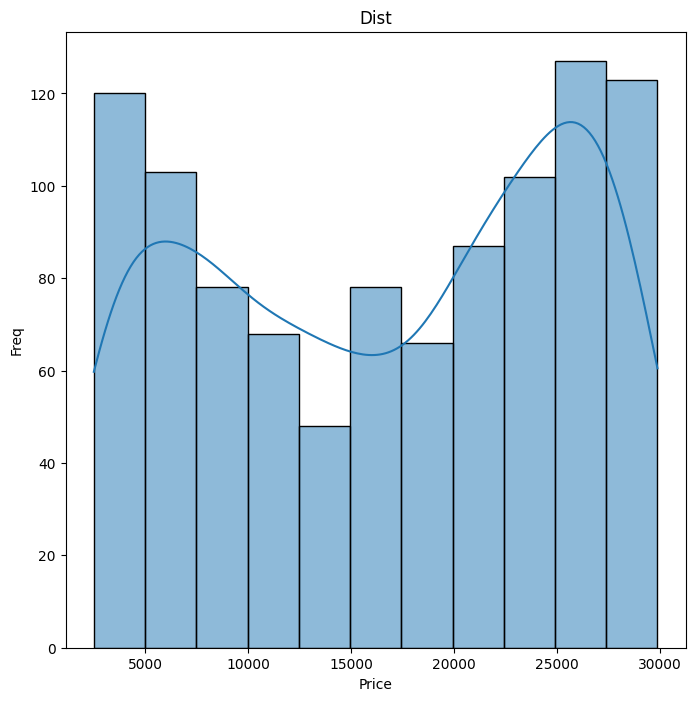

In [44]:
import matplotlib.pyplot as plt 
import seaborn as sns

plt.figure(figsize=(8,8))
sns.histplot(df['Resale Price'], kde=True)
plt.title('Dist')
plt.xlabel('Price')
plt.ylabel('Freq')

Text(0, 0.5, 'Price')

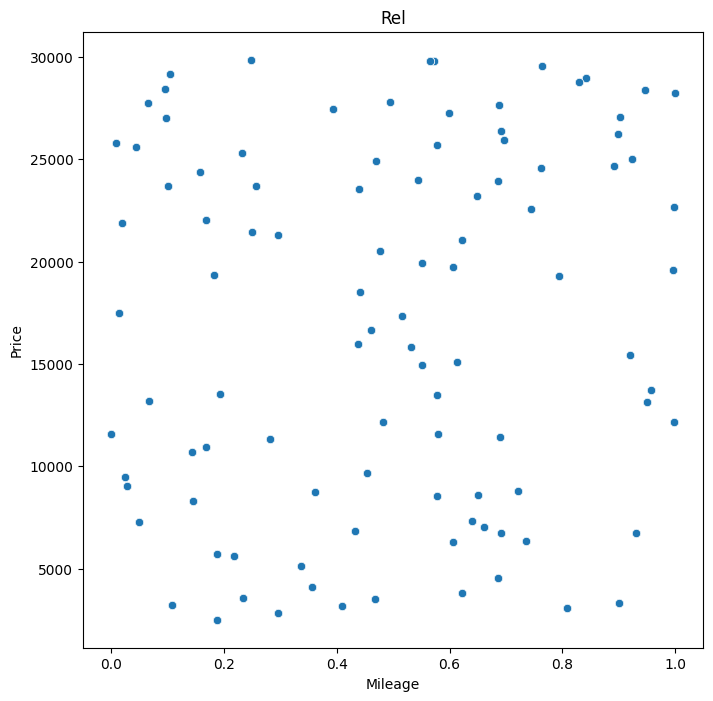

In [45]:
plt.figure(figsize=(8,8))
sns.scatterplot(data = df , x = 'Mileage (miles)', y = 'Resale Price')
plt.title('Rel')
plt.xlabel('Mileage')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

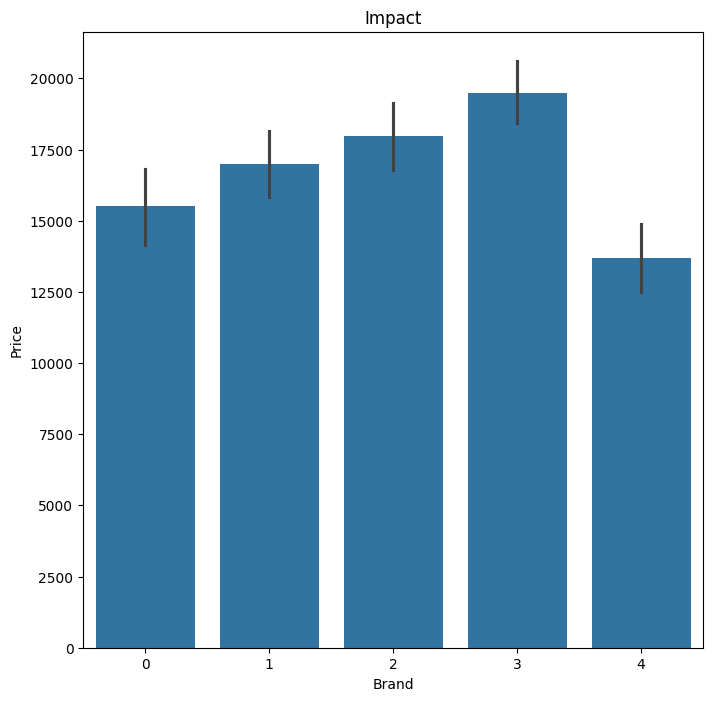

In [46]:
plt.figure(figsize=(8,8))
sns.barplot(data=df , x = 'Brand', y = 'Resale Price')
plt.title('Impact')
plt.xlabel('Brand')
plt.ylabel('Price')

In [47]:
x = df.drop('Resale Price' , axis = 1)
y = df['Resale Price']

In [48]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

lr = LinearRegression()
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()

In [51]:
lr.fit(x_train , y_train)

LinearRegression()

In [53]:
dt.fit(x_train , y_train)

DecisionTreeRegressor()

In [54]:
rf.fit(x_train , y_train)

RandomForestRegressor()

In [55]:
y_pred_lr = lr.predict(x_test)
y_pred_dt = dt.predict(x_test)
y_pred_rf = rf.predict(x_test)

In [56]:
print('MAE for lr is: ', mean_absolute_error(y_test , y_pred_lr))
print('MAE for dt is: ', mean_absolute_error(y_test , y_pred_dt))
print('MAE for rf is: ', mean_absolute_error(y_test , y_pred_rf))

MAE for lr is:  7722.679898278404
MAE for dt is:  0.0
MAE for rf is:  45.59314999999999


In [57]:
print('MSE for lr is: ', mean_squared_error(y_test , y_pred_lr))
print('MSE for dt is: ', mean_squared_error(y_test , y_pred_dt))
print('MSE for rf is: ', mean_squared_error(y_test , y_pred_rf))

MSE for lr is:  73958359.27137384
MSE for dt is:  0.0
MSE for rf is:  63766.727887500005


In [58]:
print('R2 for lr is: ', r2_score(y_test , y_pred_lr))
print('R2 for dt is: ', r2_score(y_test , y_pred_dt))
print('R2 for rf is: ', r2_score(y_test , y_pred_rf))

R2 for lr is:  0.02408389484532769
R2 for dt is:  1.0
R2 for rf is:  0.9991585673704566


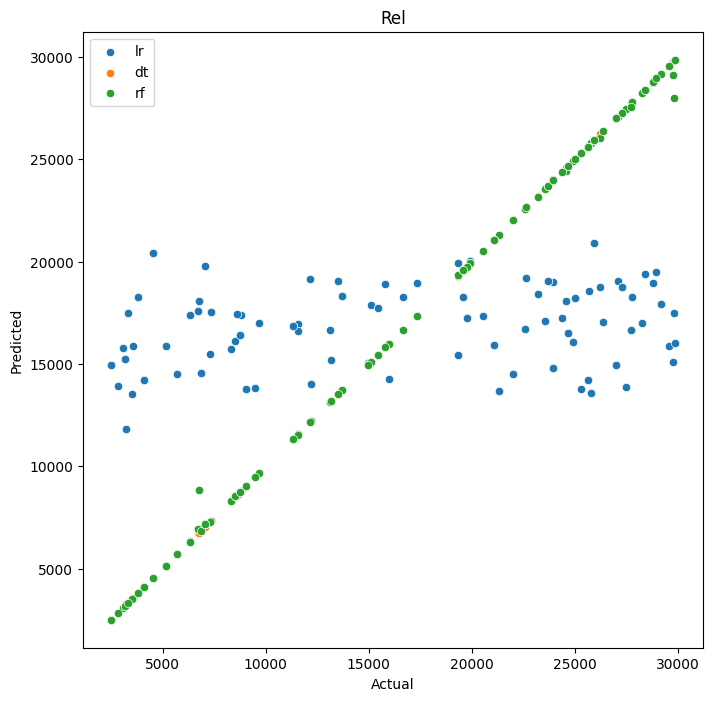

In [61]:
plt.figure(figsize=(8,8))
sns.scatterplot(x = y_test, y = y_pred_lr, label='lr')
sns.scatterplot(x = y_test, y = y_pred_dt, label='dt')
sns.scatterplot(x = y_test, y = y_pred_rf, label='rf')
plt.title('Rel')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()

In [62]:
from sklearn.model_selection import GridSearchCV

grid_params = {
    'max_depth' : [5, 10, 15, 20, 25],
    'max_leaf_nodes' : [5, 10, 15, 20, 25]
}

grid_model = GridSearchCV(estimator=dt, param_grid=grid_params, cv=5)
grid_model.fit(x_train , y_train)
print('best params', grid_model.best_params_)

best params {'max_depth': 15, 'max_leaf_nodes': 25}


In [63]:
y_pred_gs = grid_model.best_estimator_.predict(x_test)
print('MAE for gs is: ', mean_absolute_error(y_test , y_pred_gs))
print('MSE for gs is: ', mean_squared_error(y_test , y_pred_gs))
print('R2 for gs is: ', r2_score(y_test , y_pred_gs))

MAE for gs is:  2869.313703796173
MSE for gs is:  14570280.678210003
R2 for gs is:  0.807738141968317


In [ ]:
# from sklearn.model_selection import RandomizedSearchCV

# ranz_params = {
#     'max_depth' : [5, 10, 15, 20, 25],
#     'n_estimators' : [100, 200, 300, 400, 500]
# }

# ranz_model = RandomizedSearchCV(estimator=rf, param_distributions=ranz_params, cv=5)
# ranz_model.fit(x_train , y_train)
# print('best params', ranz_model.best_params_)

# y_pred_rz = ranz_model.best_estimator_.predict(x_test)
# print('MAE for rz is: ', mean_absolute_error(y_test , y_pred_rz))
# print('MSE for rz is: ', mean_squared_error(y_test , y_pred_rz))
# print('R2 for rz is: ', r2_score(y_test , y_pred_rz))

best params {'n_estimators': 300, 'max_depth': 15}
MAE for rz is:  73.70987470447561
MSE for rz is:  69058.91134096662
R2 for rz is:  0.9990887344656362


In [ ]:
# we will use DT for its great accuracy and low MSE,MAE

In [69]:
x.columns

Index(['Brand', 'Model Year', 'Mileage (miles)', 'Fuel Type', 'Condition',
       'Transmission'],
      dtype='object')

array([2, 0, 3, 4, 1])

In [74]:
import gradio as gr 
def rel_car_price(Brand, Model_year, Mileage, Fuel_type, Condition, Transmission):
    input_data = pd.DataFrame({
        'Brand' : [Brand],
        'Model Year' : [Model_year],
        'Mileage (miles)' : [Mileage],
        'Fuel Type' : [Fuel_type],
        'Condition' : [Condition],
        'Transmission' : [Transmission],
    })
    
    for col in le_cols:
        input_data[col] = le[col].transform(input_data[col])
        
    input_data[sc_cols] = sc.transform(input_data[sc_cols])
    
    prediction = dt.predict(input_data)
    return f'Price ${prediction[0]:,.2f}'

gr.Interface(
    fn = rel_car_price,
    inputs=[
        gr.Dropdown(['Ford', 'BMW', 'Toyota', 'Honda', 'Chevrolet'], label='Brand'),
        gr.Number(label = 'Model Year'),
        gr.Number(label = 'Mileage (miles)'),
        gr.Dropdown(['Electric' , 'Diesel', 'Gasoline'] , label = 'Fuel Type'),
        gr.Number(label = 'Condition 1 : 5'),
        gr.Dropdown(['Automatic' , 'Manual'] , label = 'Transmission'),
    ],
    outputs= gr.Textbox(label='The pred price'),
    title='Predict car resale'
).launch()


Running on local URL:  http://127.0.0.1:7861

To create a public link, set `share=True` in `launch()`.
